<a href="https://colab.research.google.com/github/Goodjorx/jobbarcelona22/blob/main/Insects_JobBarcelona22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from fastai.basics import *
from fastai.tabular import * 


import numpy as np
import scipy
from scipy.stats import normaltest
from scipy import pi
from scipy.fftpack import fft
from scipy.signal import spectrogram, cwt

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay

# from tsai.all import *

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Insects_Hackathon/train.csv', index_col=0)
df.head(5)

,Hour,Minutes,Sensor_alpha,Sensor_beta,Sensor_gamma,Sensor_alpha_plus,Sensor_beta_plus,Sensor_gamma_plus,Insect
0,22,26,119.910995,242.838324,-316.819222,250.195048,-53.547777,-112.049983,2
1,10,16,-90.790536,-269.470767,-182.581844,95.394941,37.291944,48.525180,0
2,21,42,-20.028003,-147.070212,50.280872,-90.750386,-50.476556,85.399009,1
3,21,17,-21.258567,0.467070,-86.164153,-21.813529,-209.256006,16.291882,0
4,18,16,-58.154501,-13.051195,-156.501167,48.392938,-110.008860,-10.285138,2


In [5]:
df.shape, df.columns

((7001, 9),
 Index(['Hour', 'Minutes', 'Sensor_alpha', 'Sensor_beta', 'Sensor_gamma',
        'Sensor_alpha_plus', 'Sensor_beta_plus', 'Sensor_gamma_plus', 'Insect'],
       dtype='object'))

In [6]:
print(f"Number of insects 0 --> {df.loc[df['Insect']==0].shape[0]}\n")
print(f"Number of insects 1 --> {df.loc[df['Insect']==1].shape[0]}\n")
print(f"Number of insects 2 --> {df.loc[df['Insect']==2].shape[0]}\n")
print(f">"*50)
print(f"\nInsect 0 represents a --> {(df.loc[df['Insect']==0].shape[0]) / df.shape[0]*100 }\n")
print(f"Insect 1 represents a --> {(df.loc[df['Insect']==1].shape[0]) / df.shape[0]*100 }\n")
print(f"Insect 2 represents a --> {(df.loc[df['Insect']==2].shape[0]) / df.shape[0]*100 }\n")


Number of insects 0 --> 3519

Number of insects 1 --> 2793

Number of insects 2 --> 689

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

Insect 0 represents a --> 50.26424796457649

Insect 1 represents a --> 39.894300814169405

Insect 2 represents a --> 9.841451221254106



In [7]:
np.sort(df['Hour'].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])

In [8]:
# df['Timestamp'] = pd.to_datetime(df[['Hour', 'Minutes']], format='%H:%M') 

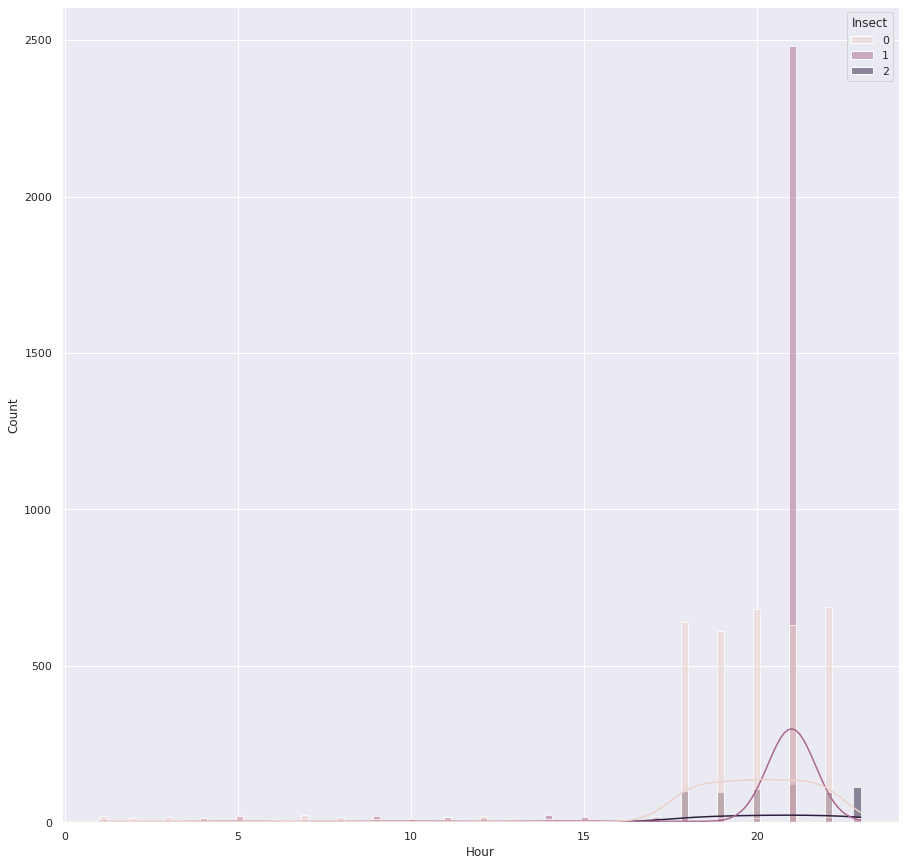

In [9]:
sns.set(rc={'figure.figsize':(15,15)})
sns.histplot(data=df , x='Hour', hue='Insect', kde=True)

We can see how almost all insects are grouped at the night. Bearing in mind insect 2 only represents the 10%, it can be seen how at 23h, a big part of the bar corresponds to them.
It is also visible the skewness of insect 1, between 20h and 22h. Meanwhile, insect 0 seems to be most equally distributed among all night. Again, we are working with unbalanced classes!

Let's try to see the mean of the sensors for each type of insect.

In [10]:
import os

In [13]:
for insect in np.sort(df['Insect'].unique()):
  # Create specific folders
  cwd = "/content/drive/MyDrive/Colab Notebooks/Insects_Hackathon"
  os.makedirs(os.path.dirname(f'{cwd}/Insect_{insect}/'), exist_ok=True)
  
  print(f"\nInsect --> {insect}")

  for col in df.columns[2:-1]:
    print(f"The mean for {col} is : {np.mean(df.loc[df['Insect']==insect][col])}")
    print(f"The standard deviation for {col} is : {np.std(df.loc[df['Insect']==insect][col])}")
    # Diferent plots for each insect and column.
    sns.boxplot(df.loc[df['Insect']==insect][col])
    plt.title(f'Boxplot for {col}')
    plt.savefig(f"{cwd}/Insect_{insect}/{col}_Boxplot.png")
    plt.clf()

    sns.histplot(x=df.loc[df['Insect']==insect][col])
    plt.title(f"Histogram for {col}")
    plt.savefig(f"{cwd}/Insect_{insect}/{col}_Histogram.png")
    plt.clf()



Insect --> 0
The mean for Sensor_alpha is : -0.5399010063646679
The standard deviation for Sensor_alpha is : 99.19814061164008


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


The mean for Sensor_beta is : -72.94005358748252
The standard deviation for Sensor_beta is : 125.72956306283147


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


The mean for Sensor_gamma is : -0.47944243530214736
The standard deviation for Sensor_gamma is : 110.97282663068222


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


The mean for Sensor_alpha_plus is : 69.6705108307462
The standard deviation for Sensor_alpha_plus is : 107.2113276125129


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


The mean for Sensor_beta_plus is : -1.4821692241017
The standard deviation for Sensor_beta_plus is : 100.51486160034223


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


The mean for Sensor_gamma_plus is : -1.1669437234999545
The standard deviation for Sensor_gamma_plus is : 101.11860269617637


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning



Insect --> 1
The mean for Sensor_alpha is : 1.6521728732347283
The standard deviation for Sensor_alpha is : 98.57257896296484


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


The mean for Sensor_beta is : -2.6453650855824957
The standard deviation for Sensor_beta is : 126.21300826346702


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


The mean for Sensor_gamma is : 4.744292613414693
The standard deviation for Sensor_gamma is : 118.90391358203858


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


The mean for Sensor_alpha_plus is : -69.64013071553131
The standard deviation for Sensor_alpha_plus is : 83.24567244067784


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


The mean for Sensor_beta_plus is : 1.0336086124715158
The standard deviation for Sensor_beta_plus is : 99.84236124614651


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


The mean for Sensor_gamma_plus is : 1.2270712815791305
The standard deviation for Sensor_gamma_plus is : 100.53535548966933


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning



Insect --> 2
The mean for Sensor_alpha is : 0.9086559583202065
The standard deviation for Sensor_alpha is : 102.52548642096174


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


The mean for Sensor_beta is : 78.68760499140316
The standard deviation for Sensor_beta is : 101.96046765842542


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


The mean for Sensor_gamma is : -73.93629618850886
The standard deviation for Sensor_gamma is : 104.68281225680501


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


The mean for Sensor_alpha_plus is : -0.49642049001988453
The standard deviation for Sensor_alpha_plus is : 145.96965791310626


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


The mean for Sensor_beta_plus is : -4.321012054581824
The standard deviation for Sensor_beta_plus is : 98.1720909196963


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


The mean for Sensor_gamma_plus is : -4.648800590678871
The standard deviation for Sensor_gamma_plus is : 97.27105100686386


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 1080x1080 with 0 Axes>

One easy thing we could try is to find hidden pattern with Autoencoders, which reduces the space. Inside the latent space we can try to find clusters, and maybe they correspond to the insect type. 